<a href="https://colab.research.google.com/github/AlvinAditiya117/PCVK25_3F_04/blob/main/Week6_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alvin Aditiya 3F 04 2341720020

#**PRAKTIKUM FILTER**

**Mount Google Drive dan Import Library**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im


Mounted at /content/drive


**Fungsi Konvolusi Manual**

In [ ]:
def convolution(image, kernel):
    img_height, img_width = image.shape
    k_height, k_width = kernel.shape
    pad_h, pad_w = k_height // 2, k_width // 2

    # Padding citra
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Inisialisasi hasil
    output = np.zeros_like(image, dtype=float)

    # Proses konvolusi
    for i in range(img_height):
        for j in range(img_width):
            region = padded[i:i+k_height, j:j+k_width]
            output[i, j] = np.sum(region * kernel)

    # Normalisasi ke 0-255
    output = np.clip(output, 0, 255)
    return output.astype(np.uint8)


**Load Gambar dari Drive dan Ubah ke Grayscale**

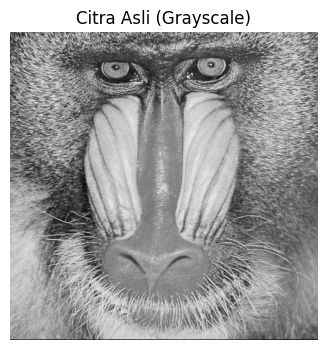

In [ ]:
img_path = '/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_04/mandrill.tiff'
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(4,4))
plt.imshow(img, cmap='gray')
plt.title('Citra Asli (Grayscale)')
plt.axis('off')
plt.show()


**Definisikan Kernel Filter**

In [ ]:
# Average filter
avg_kernel = np.ones((3,3), np.float32) / 9

# Low Pass Filter
low_pass_kernel = np.array([[1,1,1],
                            [1,4,1],
                            [1,1,1]], np.float32) / 12

# High Pass Filter
high_pass_kernel = np.array([[-1,0,1],
                             [-1,0,3],
                             [-3,0,1]], np.float32)

# Sharpen
sharpen_kernel = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]], np.float32)

# Emboss
emboss_kernel = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]], np.float32)

# Sobel Edge Detection
sobel_kernel = np.array([[1,0,-1],
                         [2,0,-2],
                         [1,0,-1]], np.float32)

# Canny-like Edge Detection (Laplacian)
canny_kernel = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]], np.float32)


**Terapkan Fungsi Konvolusi untuk Setiap Filter**

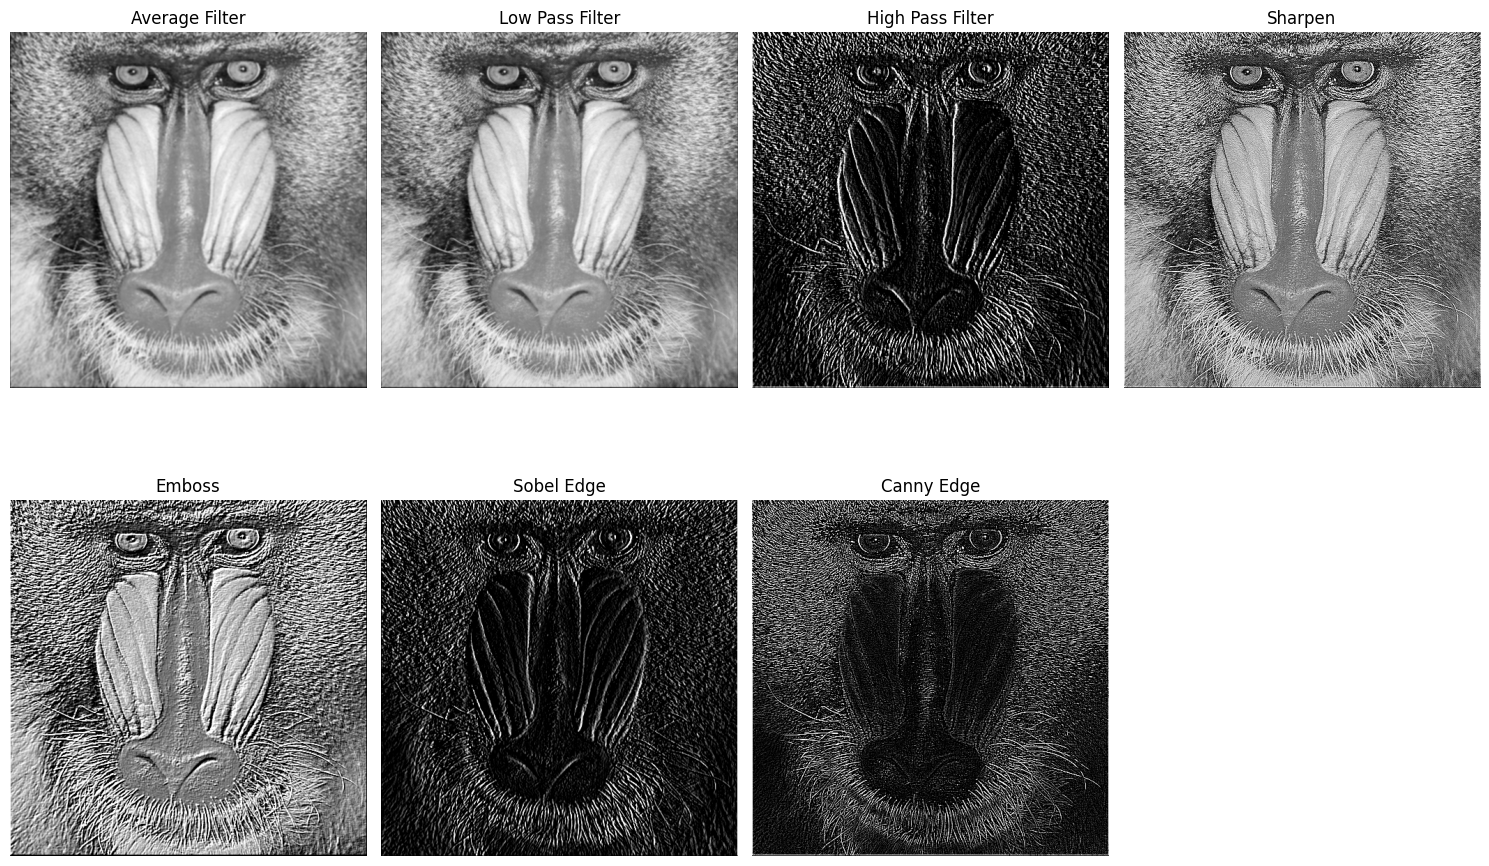

In [ ]:
filters = {
    "Average Filter": avg_kernel,
    "Low Pass Filter": low_pass_kernel,
    "High Pass Filter": high_pass_kernel,
    "Sharpen": sharpen_kernel,
    "Emboss": emboss_kernel,
    "Sobel Edge": sobel_kernel,
    "Canny Edge": canny_kernel
}

plt.figure(figsize=(15,10))
for idx, (name, kernel) in enumerate(filters.items()):
    result = convolution(img, kernel)
    plt.subplot(2, 4, idx+1)
    plt.imshow(result, cmap='gray')
    plt.title(name)
    plt.axis('off')
plt.tight_layout()
plt.show()


**Gaussian Blur 21×21**

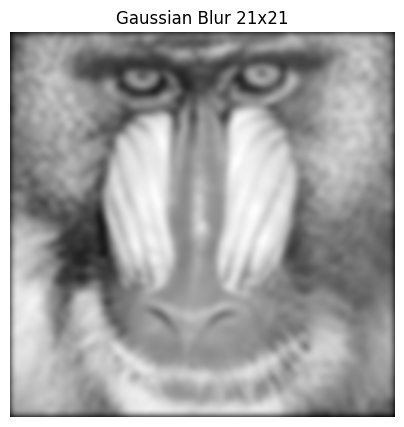

In [ ]:
kernel_size = 21
sigma = math.sqrt(kernel_size)

gaussian_kernel_1d = cv.getGaussianKernel(kernel_size, sigma)
gaussian_kernel = gaussian_kernel_1d @ gaussian_kernel_1d.T

gaussian_blur = convolution(img, gaussian_kernel)

plt.figure(figsize=(5,5))
plt.title("Gaussian Blur 21x21")
plt.imshow(gaussian_blur, cmap='gray')
plt.axis('off')
plt.show()


#**FILTER LIBRARY DAN FILTER MODERN**

**Import Library dan Load Gambar**

In [13]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Percobaan 1 – Filter Gaussian, Sharpen, dan Canny**

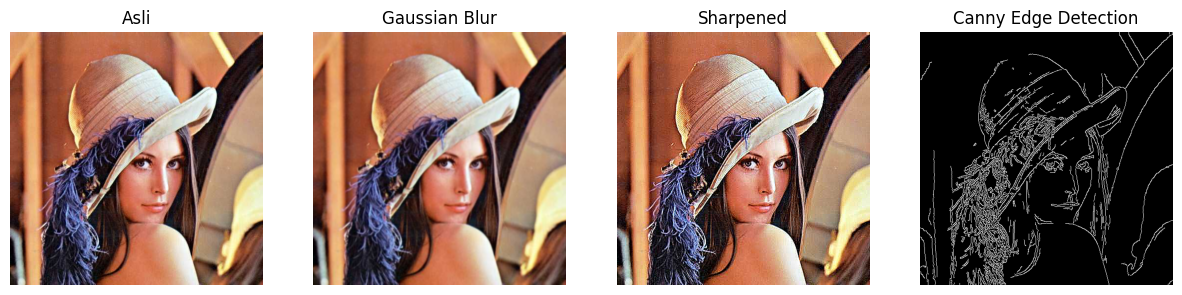

In [19]:
# Fungsi tampil berdampingan
def show_side_by_side(images, titles, figsize=(15,5)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        if len(img.shape) == 2:   # grayscale
            plt.subplot(1, len(images), i+1)
            plt.imshow(img, cmap='gray')
        else:                     # color
            plt.subplot(1, len(images), i+1)
            plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
    plt.show()

img = cv.imread("/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_04/lena.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

blur = cv.GaussianBlur(img, (7,7), 1)
edges = cv.Canny(cv.cvtColor(img, cv.COLOR_BGR2GRAY), 100, 200)
sharpen_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharpened = cv.filter2D(img, -1, sharpen_kernel)
show_side_by_side([img, blur, sharpened, edges], ["Asli", "Gaussian Blur", "Sharpened", "Canny Edge Detection"])


**Percobaan 2 – Bilateral dan Guided Filter**

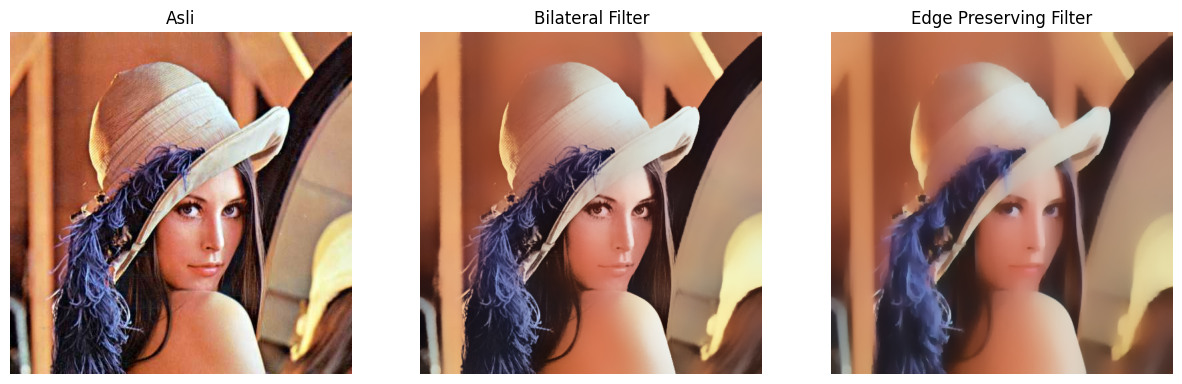

In [20]:
#Filter Modern dari OpenCV
# Bilateral Filter (edge-preserving)
bilateral = cv.bilateralFilter(img, 50, 100, 100)

# Edge Preserving Filter (pengganti Guided Filter)
edge_preserve = cv.edgePreservingFilter(img, flags=1, sigma_s=100, sigma_r=0.9)

show_side_by_side([img, bilateral, edge_preserve],
                  ["Asli", "Bilateral Filter", "Edge Preserving Filter"])


**Percobaan 3 – Filtering pada CNN (Feature Map)**

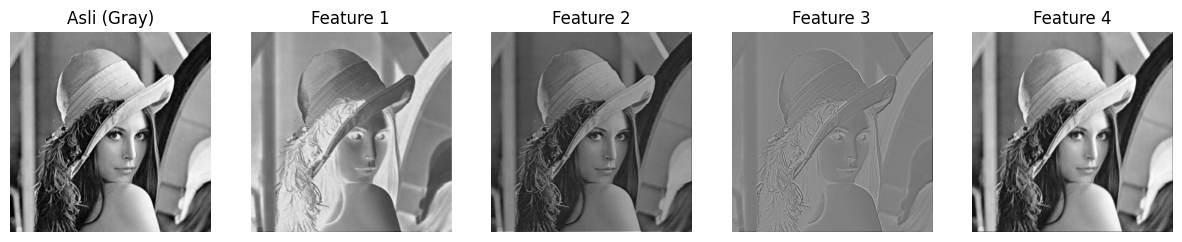

In [22]:
#Filter Feature Map yang digunakan pada CNN,
#Lakukan running code bagian ini beberapa kali dan perhatikan hasilnya

import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        return self.conv1(x)

model = SimpleCNN()

# Ubah gambar ke tensor
img_tensor = torch.tensor(img_gray, dtype=torch.float32).unsqueeze(0).unsqueeze(0) / 255.0

# Hasil CNN
with torch.no_grad():
    features = model(img_tensor)

# Visualisasi feature maps
feature_maps = [features[0, i].numpy() for i in range(features.shape[1])]
show_side_by_side([img_gray] + feature_maps,
                  ["Asli (Gray)"] + [f"Feature {i+1}" for i in range(len(feature_maps))])


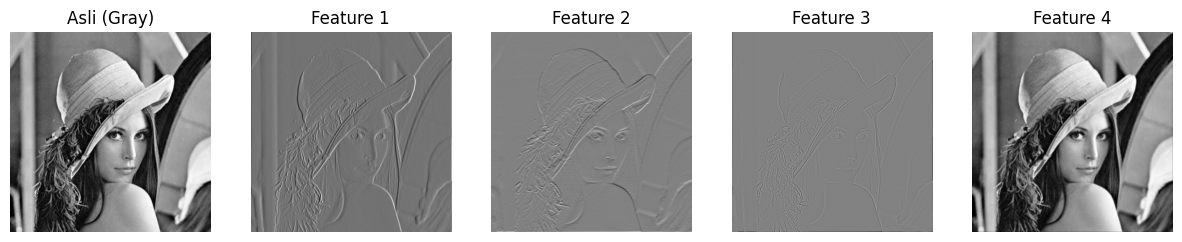

In [23]:
# Filter Feature Map yang digunakan pada CNN (hasil tetap, tidak random)
import torch
import torch.nn as nn

# Atur seed agar hasil tetap sama setiap kali dijalankan
torch.manual_seed(0)

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1)
        # Inisialisasi bobot kernel secara manual (biar tidak acak)
        with torch.no_grad():
            self.conv1.weight[:] = torch.tensor([
                [[[1, 0, -1], [1, 0, -1], [1, 0, -1]]],    # deteksi tepi vertikal
                [[[1, 1, 1], [0, 0, 0], [-1, -1, -1]]],    # deteksi tepi horizontal
                [[[0, 1, 0], [1, -4, 1], [0, 1, 0]]],      # laplacian
                [[[1, 2, 1], [2, 4, 2], [1, 2, 1]]]        # gaussian-like
            ], dtype=torch.float32)
            self.conv1.bias.zero_()  # Hilangkan bias agar netral

    def forward(self, x):
        return self.conv1(x)

# Buat model CNN
model = SimpleCNN()

# Ubah gambar ke tensor
img_tensor = torch.tensor(img_gray, dtype=torch.float32).unsqueeze(0).unsqueeze(0) / 255.0

# Hasil CNN (non-random)
with torch.no_grad():
    features = model(img_tensor)

# Visualisasi feature maps
feature_maps = [features[0, i].numpy() for i in range(features.shape[1])]
show_side_by_side([img_gray] + feature_maps,
                  ["Asli (Gray)"] + [f"Feature {i+1}" for i in range(len(feature_maps))])


**Percobaan 4 – Efek Beauty dan Vintage**

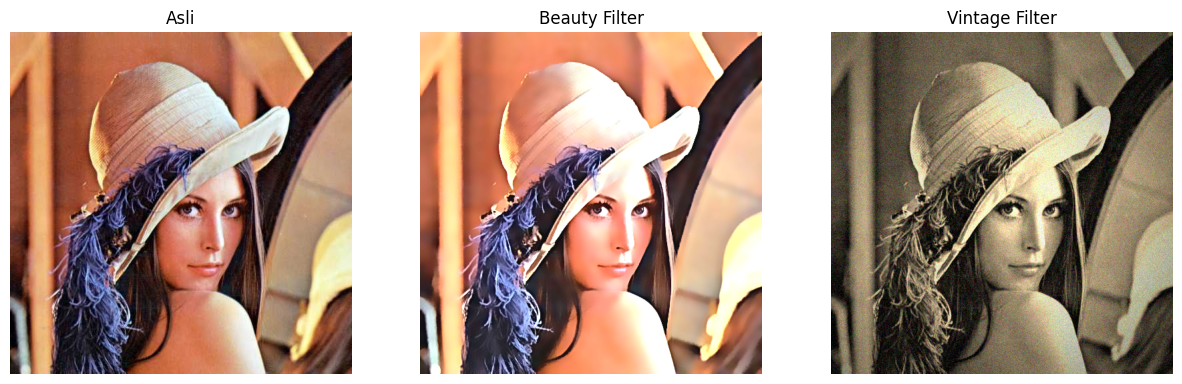

In [24]:
# =====================
# 1. Beauty Filter
# =====================

# Step 1 : Smoothing kulit dengan bilateral filter
smooth = cv.bilateralFilter(img, d=15, sigmaColor=75, sigmaSpace=75)

# Step 2 : Unsharp masking (pertajam mata/bibir)
gaussian = cv.GaussianBlur(smooth, (0, 0), 3)
sharpened = cv.addWeighted(smooth, 1.5, gaussian, -0.5, 0)

# Step 3 : Brightness & contrast
alpha = 1.2   # contrast
beta = 15     # brightness
beauty = cv.convertScaleAbs(sharpened, alpha=alpha, beta=beta)


# =====================
# 2. Old/Vintage Filter
# =====================

# Step 1 : Sepia tone
sepia_kernel = np.array([[0.272, 0.534, 0.131],
                         [0.349, 0.686, 0.168],
                         [0.393, 0.769, 0.189]])
sepia = cv.transform(img, sepia_kernel)
sepia = np.clip(sepia, 0, 255).astype(np.uint8)

# Step 2 : Vignette
cols, rows = img.shape[:2]
kernel_x = cv.getGaussianKernel(cols, cols*0.6)
kernel_y = cv.getGaussianKernel(rows, rows*0.6)
kernel = kernel_y * kernel_x.T
mask = kernel / kernel.max()
vignette = np.copy(sepia)
for i in range(3):
    vignette[:,:,i] = vignette[:,:,i] * mask

# Step 3 : Noise/Grain
noise = np.random.normal(0, 15, vignette.shape).astype(np.int16)
vignette = np.clip(vignette.astype(np.int16) + noise, 0, 255).astype(np.uint8)


# Fungsi tampil berdampingan (pakai yang sama dari percobaan sebelumnya)
show_side_by_side([img, beauty, vignette],
                  ["Asli", "Beauty Filter", "Vintage Filter"])


**Percobaan 5 – Filter Anime / Cartoon**

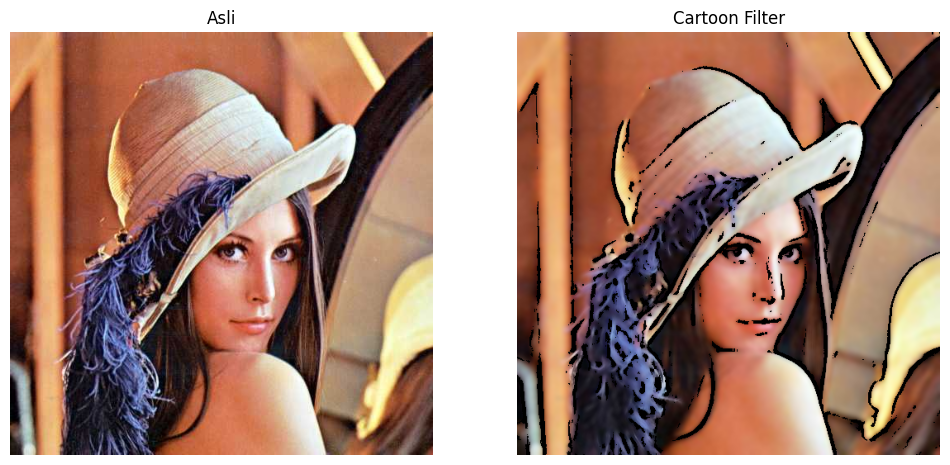

In [34]:
# Filter Anime / Cartoon
# ===============================

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Fungsi bantu untuk menampilkan gambar berdampingan
def show_side_by_side(images, titles):
    plt.figure(figsize=(12, 6))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        img_rgb = cv.cvtColor(images[i], cv.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Baca gambar
img = cv.imread("/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_04/lena.jpg")

# Step 1: Edge detection (pakai median blur dulu agar gambar menjadi lebih halus)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_blur = cv.medianBlur(gray, 7)
edges = cv.adaptiveThreshold(gray_blur, 255,
                             cv.ADAPTIVE_THRESH_MEAN_C,
                             cv.THRESH_BINARY, 9, 9)

# Step 2: Bilateral filter untuk smoothing warna
color = cv.bilateralFilter(img, d=9, sigmaColor=200, sigmaSpace=200)

# Step 3: Gabungkan (cartoonize)
cartoon = cv.bitwise_and(color, color, mask=edges)

# Tampilkan
show_side_by_side([img, cartoon],
                  ["Asli", "Cartoon Filter"])


**Percobaan 6 – Filter Malam**

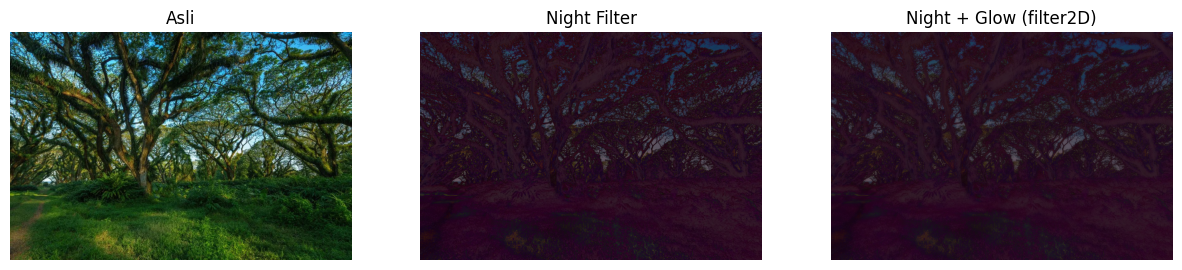

In [31]:


# --- Fungsi bantu untuk menampilkan beberapa gambar berdampingan ---
def show_side_by_side(images, titles):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        img_rgb = cv.cvtColor(images[i], cv.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# --- Mulai Percobaan 6 ---
# Baca gambar
img = cv.imread("/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_04/djawatan.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Step 1: Gelapkan (contrast turun, brightness negatif)
night = cv.convertScaleAbs(img, alpha=0.6, beta=-40)

# Step 2: Tambah bias biru
blue_tint = np.full_like(night, (50, 0, 100))  # BGR
night = cv.addWeighted(night, 0.8, blue_tint, 0.2, 0)

# Step 3: Efek glow di area terang dengan filter2D (blur kernel)
kernel = np.ones((15,15), np.float32) / 225
glow = cv.filter2D(night, -1, kernel)

# Kombinasikan asli + glow
night_glow = cv.addWeighted(night, 0.7, glow, 0.3, 0)

# --- Tampilkan hasil seperti di gambar tugas ---
show_side_by_side(
    [img, night, night_glow],
    ["Asli", "Night Filter", "Night + Glow (filter2D)"]
)


**Percobaan 7 – Filter Pagi dan Efek Kabut**

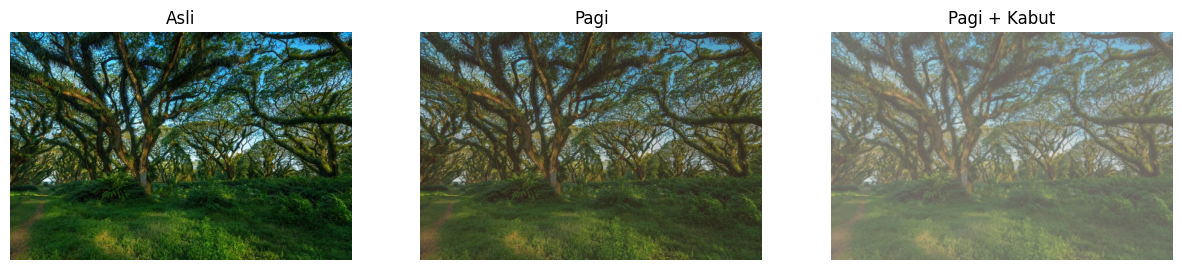

In [33]:
# Filter Suasana pagi dan Kabut
# ===============================


# Fungsi bantu agar sama dengan percobaan sebelumnya
def show_side_by_side(images, titles):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        img_rgb = cv.cvtColor(images[i], cv.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Baca gambar
img = cv.imread("/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_04/djawatan.jpg")

# ===============================
# Step 1: Kurangi kontras & cerahkan
# ===============================
alpha = 0.9   # contrast
beta = 20     # brightness
soft = cv.convertScaleAbs(img, alpha=alpha, beta=beta)

# ===============================
# Step 2: Tambahkan warm tone (kemerahan / oranye)
# ===============================
warm_tint = np.full_like(soft, (40, 70, 120))  # BGR
pagi = cv.addWeighted(soft, 0.8, warm_tint, 0.2, 0)

# ===============================
# Step 3: Tambahkan haze (kabut tipis) dengan filter2D
# ===============================
# Kernel blur Gaussian-like untuk menciptakan efek kabut
kernel = cv.getGaussianKernel(3, 3)
kernel = kernel @ kernel.T   # jadikan 2D kernel
kabut = cv.filter2D(pagi, -1, kernel)

# tambah layer putih untuk kabut lebih nyata
white_layer = np.full_like(pagi, 255)
kabut = cv.addWeighted(kabut, 0.7, white_layer, 0.3, 0)

# ===============================
# Tampilkan hasil seperti di gambar tugas
# ===============================
show_side_by_side([img, pagi, kabut],
                  ["Asli", "Pagi", "Pagi + Kabut"])
